<a href="https://colab.research.google.com/github/augmentedme/sentiment-analysis/blob/master/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis

# Exploratory Data Analysis

### Data Set Source: [Data Sets](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences)
 Root Source: From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015

## Making Data Frame

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading and Cleaning Data

In [ ]:
import pandas as pd
df_dict = {'yelp' : '/content/drive/My Drive/Colab Notebooks/Final Project Hi-tech Park/Sentiment Analysis/sentiment sentences/yelp_labelled.txt',
           'amazon' : '/content/drive/My Drive/Colab Notebooks/Final Project Hi-tech Park/Sentiment Analysis/sentiment sentences/amazon_cells_labelled.txt',
           'imdb' : '/content/drive/My Drive/Colab Notebooks/Final Project Hi-tech Park/Sentiment Analysis/sentiment sentences/imdb_labelled.txt'}
df_list = []
for source, filepath in df_dict.items():
  df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
  df['source'] = source
  df_list.append(df)
df_list

[                                              sentence  label source
 0                             Wow... Loved this place.      1   yelp
 1                                   Crust is not good.      0   yelp
 2            Not tasty and the texture was just nasty.      0   yelp
 3    Stopped by during the late May bank holiday of...      1   yelp
 4    The selection on the menu was great and so wer...      1   yelp
 ..                                                 ...    ...    ...
 995  I think food should have flavor and texture an...      0   yelp
 996                           Appetite instantly gone.      0   yelp
 997  Overall I was not impressed and would not go b...      0   yelp
 998  The whole experience was underwhelming, and I ...      0   yelp
 999  Then, as if I hadn't wasted enough of my life ...      0   yelp
 
 [1000 rows x 3 columns],
                                               sentence  label  source
 0    So there is no way for me to plug it in here i...      

In [ ]:
## Concatenating DF list and creating imaginary index to see the data
df = pd.concat(df_list)
df.iloc[0]   #Purely integer-location based indexing for selection by position.

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object

In [ ]:
df.head()

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp


In [ ]:
df.tail()

,sentence,label,source
743,I just got bored watching Jessice Lange take h...,0,imdb
744,"Unfortunately, any virtue in this film's produ...",0,imdb
745,"In a word, it is embarrassing.",0,imdb
746,Exceptionally bad!,0,imdb
747,All in all its an insult to one's intelligence...,0,imdb


In [ ]:
df.shape

(2748, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2748 entries, 0 to 747
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  2748 non-null   object
 1   label     2748 non-null   int64 
 2   source    2748 non-null   object
dtypes: int64(1), object(2)
memory usage: 85.9+ KB


In [ ]:
df.isnull().sum() # Checking null Values

sentence    0
label       0
source      0
dtype: int64

In [ ]:
df['label'].value_counts() # Counting values of Positive and Negative reviews

1    1386
0    1362
Name: label, dtype: int64

## Aplying Machine Learning Algorithm

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [ ]:
tfidf=TfidfVectorizer(tokenizer=data_cleaning)
classifier=SVC()

In [ ]:
text=" ".join(df['sentence'])


In [ ]:
X=df['sentence']
y=df['label']

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,shuffle=True,random_state=0,test_size=0.2)

In [ ]:
X_train.shape, X_test.shape 

((2198,), (550,))

In [ ]:
clf=Pipeline([('tfidf',tfidf),('clf',classifier)])

In [ ]:
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function data_cleaning at 0x7fa3b2900c80>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0

## Model Performance Metrics

In [ ]:
y_pred=clf.predict(X_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       279
           1       0.76      0.82      0.79       271

    accuracy                           0.79       550
   macro avg       0.79      0.79      0.79       550
weighted avg       0.79      0.79      0.79       550



In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[209  70]
 [ 48 223]]


## Plotting

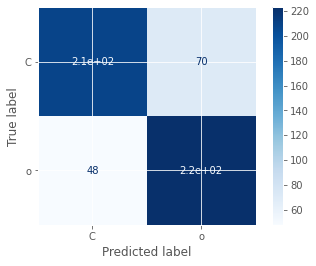

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels='Confusion Matrix',
                                 cmap=plt.cm.Blues)
plt.show()

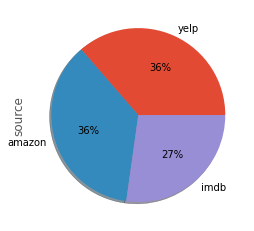

In [ ]:
df['source'].value_counts().plot(kind='pie', autopct='%1.0f%%', shadow=True)

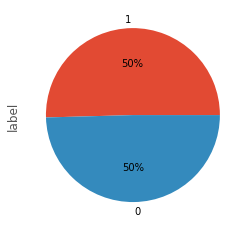

In [ ]:
df.label.value_counts().plot(kind='pie', autopct='%1.0f%%')